In [1]:
#Import packages 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
from itertools import chain
from scipy.optimize import curve_fit
from scipy import interpolate

In [2]:
# import tensile tests data from raw archive
# sample_number = input("Which sample do you want to analyze?")
# am = "am"+ sample_number + ".csv"
# path = os.path.join('mech_test/data', am)
data = pd.read_csv('data/am1.csv', sep = ';', header = 1, usecols = ['(s)', '(mm)', '(kN)', '(mm/mm)', '(MPa)'], skiprows = 4, encoding = 'latin_1')

In [3]:
strain = data['(mm/mm)']
stress = data['(MPa)']
load = data['(kN)']
elong = data['(mm)']
time = data['(s)']

In [4]:
# plot the engineering stress strain curve

def engineering_ss(strain, stress):
    
    %matplotlib inline
    plt.figure(figsize = (16, 9))
    plt.plot(strain, stress, 'r-')
    plt.xlabel('strain (mm/mm)')
    plt.ylabel('stress (MPa)')

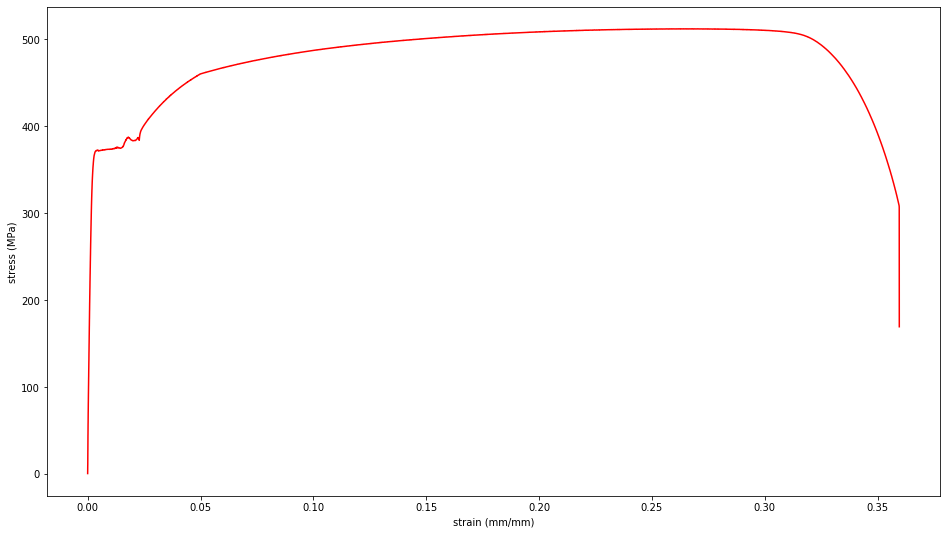

In [5]:
engineering_ss(strain, stress)

In [6]:
def hooke(eps, E, b):
    return E * eps + b
    
    
    

In [7]:
elastic = data[1000:2500]
eps = elastic['(mm/mm)']
sig = elastic['(MPa)']

def elastic_mod(eps, sig):
    init_guess = [150000, 0]

    model = curve_fit(hooke, eps, sig, init_guess)

    ans, cov = model
    E, b = ans    
    fit_curve = E * eps + b

    %matplotlib inline
    plt.figure(figsize = (16,9))
    plt.plot(eps, sig, 'b.')
    plt.plot(eps, fit_curve, 'r-' )
    return E, int(b)
    


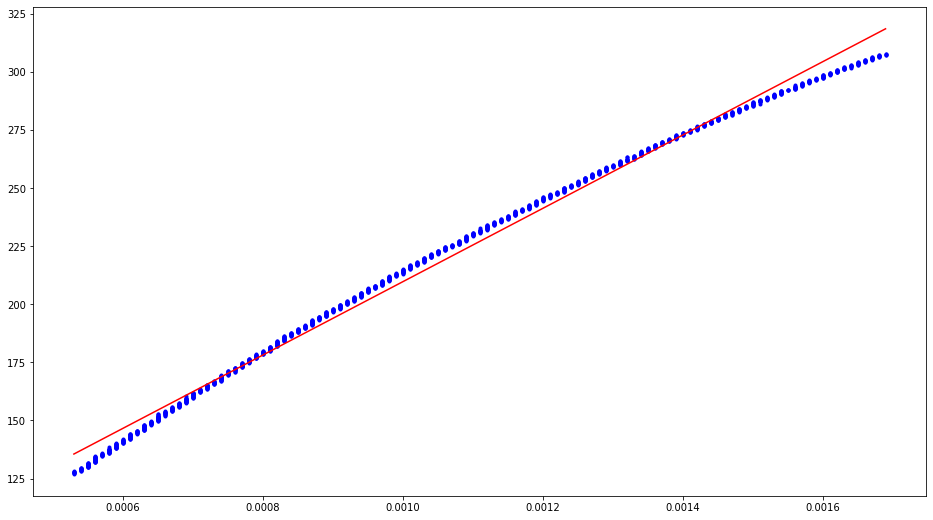

In [8]:
E, b = elastic_mod(eps, sig)
 

In [9]:
E

157677.4390233252

Text(0, 0.5, 'stress (MPa)')

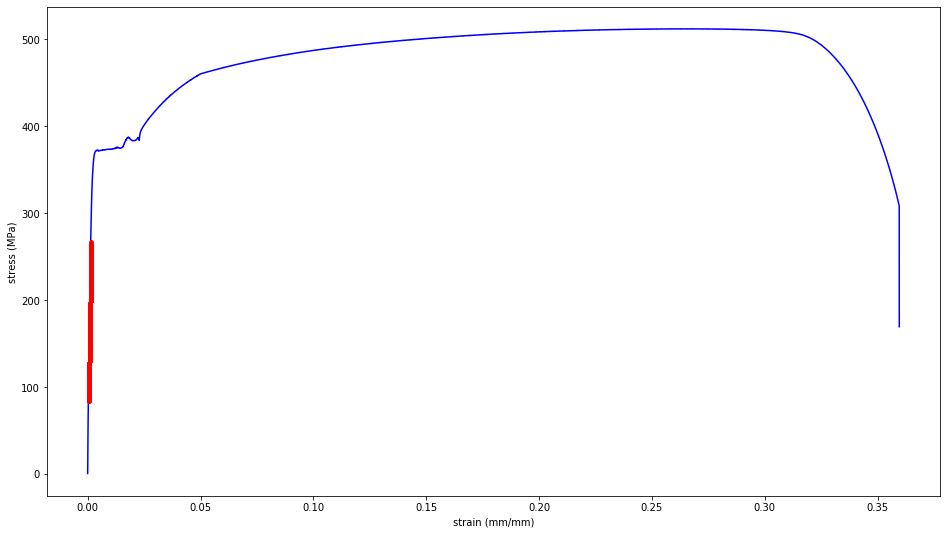

In [10]:

fitted =  E * eps
%matplotlib inline
plt.figure(figsize = (16,9))
plt.plot(strain, stress, 'b-')
plt.plot(eps, fitted, 'r.' )
plt.xlabel('strain (mm/mm)')
plt.ylabel('stress (MPa)')


In [11]:
def de(strain):
    deps = []
    for i in range(len(strain)):
        if i == 0:
            dx = None
        elif strain[i]==strain[i-1]:
            dx = None
        else:    
            dx = strain[i]-strain[i-1]
        
        deps.append(dx)

    return deps
    
def ds(stress):
    dsig = []
    for i in range(len(stress)):
        if i == 0:
            dy = 1E-6
        elif stress[i]==stress[i-1]:
            dy = 1E-6
        else:    
            dy = stress[i]-stress[i-1]
        
        dsig.append(dy)

    return dsig

def derivative(dx, dy):
    deriv = []
    for i in range(len(dx)):
        diff = dy[i]/dx[i]
        if diff < 0:
            diff = None
        deriv.append(diff)
    
    return deriv

In [12]:
data['dx'] = de(strain)
data['dy'] = ds(stress)
data['ds/de'] = derivative(data['dx'],data['dy'] )
dsde = data['ds/de']

In [23]:
def clean(strain, dsde):
    strain_1 =[]
    ds =[]
    for i in range(len(strain)):
        if i == 0:
            st = strain
            d = dsde
        elif strain[i] > strain[i-1]:
            st = strain
            d = dsde
        strain_1.append(st)
        ds.append(d)
    return strain_1, ds

In [26]:
c_strain, c_dsde = clean(strain, dsde)
# data['cresc_strain'] = cresc_strain
# data['cresc_dsde'] = cresc_dsde

In [ ]:
# x = data()
%matplotlib inline
plt.figure(figsize=(16,9))
plt.plot(c_strain, c_dsde, 'g-')

In [1]:
d_sig = interpolate.InterpolatedUnivariateSpline(strain, data['ds/de'])

NameError: name 'interpolate' is not defined

In [ ]:
%matplotlib inline
plt.figure(figsize = (16, 9))
plt.plot(strain, data['ds/de'], 'r.')
plt.plot(strain, stress, 'b-')
plt.plot(strain, d_sig, 'g-')
plt.xlabel('strain (mm/mm)')
plt.ylabel('ds/de')
plt.ylim(0, 600)